In [146]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the Data
df_crimes = pd.read_csv('//officechihome8.office.adroot.bmogc.net/Userdata8$/joh01/home/kaggle/ChicagoCrime/Data/crimes_2005_on.csv', index_col=['Date'])

In [4]:
df_crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2015 12:00:00 AM,9993839,HY183887,068XX S PAULINA ST,1541,OBSCENITY,SALE/DIST OBSCENE MAT TO MINOR,RESIDENCE,False,True,725,...,17.0,67.0,26,1166188.0,1859423.0,2015,10/10/2019 04:11:30 PM,41.769832,-87.666383,"(41.769832073, -87.666382614)"
01/01/2015 12:00:00 AM,11028448,JA360336,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,1532,...,37.0,25.0,02,NaN,NaN,2015,09/02/2019 03:57:18 PM,NaN,NaN,NaN
01/01/2015 12:00:00 AM,11116187,JA463360,033XX W CRYSTAL ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1422,...,26.0,23.0,17,NaN,NaN,2015,08/28/2019 04:08:10 PM,NaN,NaN,NaN
01/01/2015 12:00:00 AM,11800937,JC400566,110XX S INDIANA AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,513,...,9.0,49.0,11,NaN,NaN,2015,08/21/2019 04:26:07 PM,NaN,NaN,NaN
01/01/2015 12:00:00 AM,10179775,HY368117,022XX S SAWYER AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,1024,...,12.0,30.0,02,1155042.0,1888945.0,2015,08/19/2019 04:12:25 PM,41.851074,-87.706450,"(41.851074338, -87.706449961)"


In [6]:
#Extract Year, Month, Day, Hour, and Minutes
df_crimes['Date'] = pd.to_datetime(df_crimes.index)
df_crimes['Date_year'] = df_crimes.Date.map(lambda x:x.year)
df_crimes['Date_month'] = df_crimes.Date.map(lambda x:x.month)
df_crimes['Date_day'] = df_crimes.Date.map(lambda x:x.day)
df_crimes['Date_hour'] = df_crimes.Date.map(lambda x:x.hour)
df_crimes['Date_minute'] = df_crimes.Date.map(lambda x:x.minute)
df_crimes['Date_weekday'] = df_crimes.Date.map(lambda x:x.dayofweek)

df= df_crimes

EDA

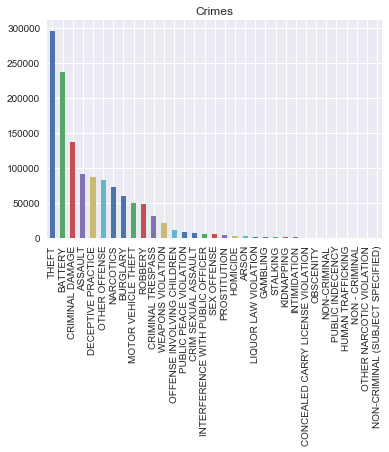

In [9]:
df['Primary Type'].value_counts().plot.bar()
plt.title("Crimes")
plt.show()

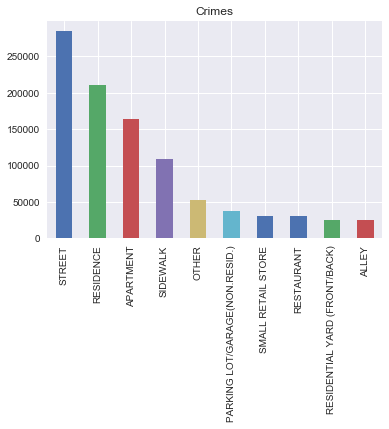

In [13]:
df['Location Description'].value_counts()[:10].plot.bar()
plt.title("Crimes")
plt.show()

In [22]:
def fn_barplot(data, col):
    if data[col].dtype in ['object']:
        fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15, 20))

        plot_df = df[['Arrest',col]].dropna()
        df_1 = plot_df.loc[plot_df['Arrest']==True]
        df_2 = plot_df.loc[plot_df['Arrest']==False]

        df_1.groupby(col)[col].count().plot(kind='barh', ax=ax1, title='Arrest: ' + col)
        df_2.groupby(col)[col].count().plot(kind='barh', ax=ax2, title='No Arrest: ' + col)
    return plt.show()

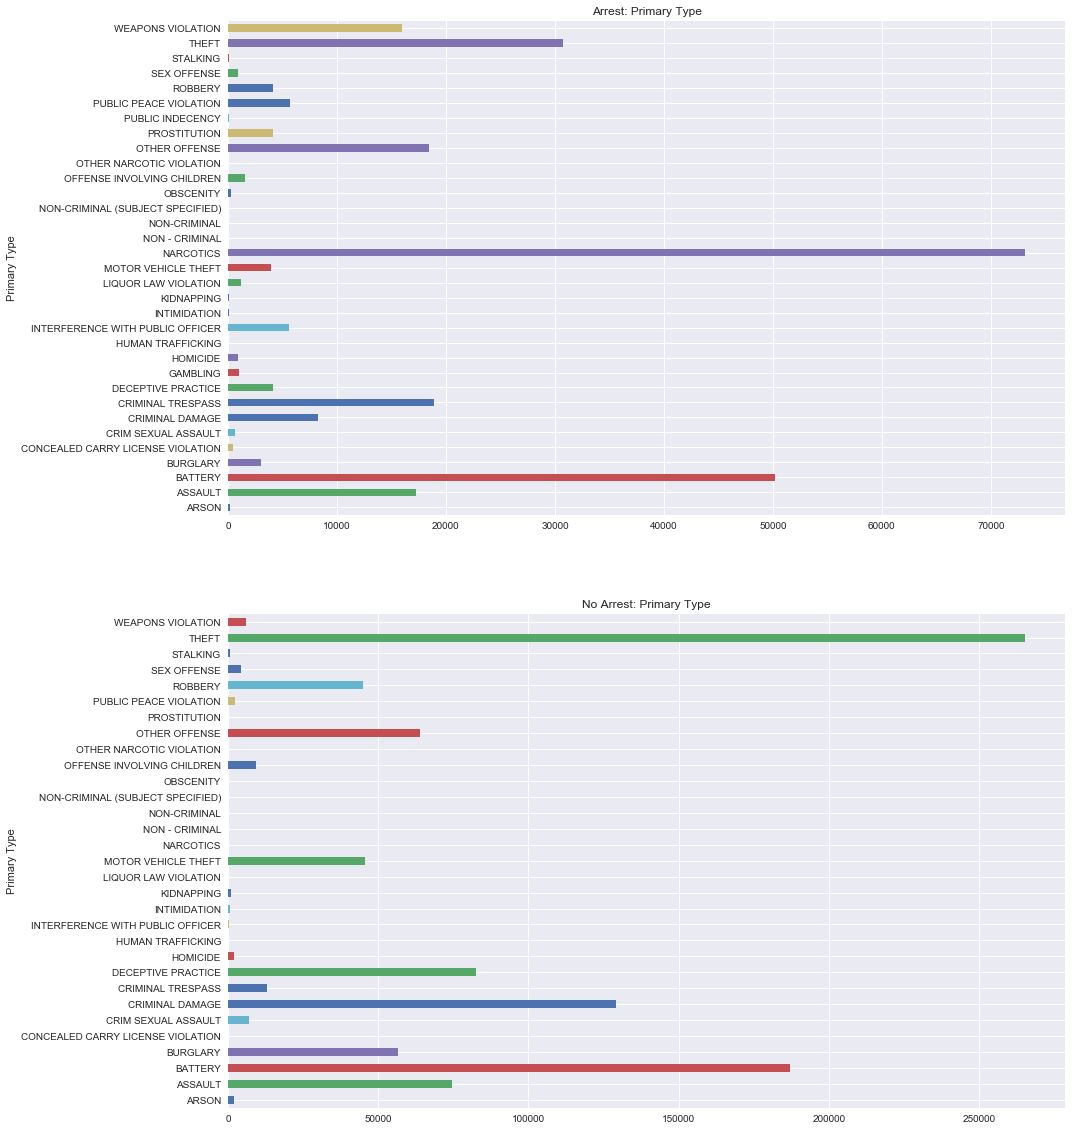

In [23]:
fn_barplot(df, 'Primary Type')

In [ ]:
#Create Crimes Map

In [24]:
import folium

In [42]:
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11)

In [55]:
Crimes = df[df["Primary Type"] == "THEFT"]
locations = Crimes.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [56]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)
chicago_map

In [ ]:
#Time Dimensions

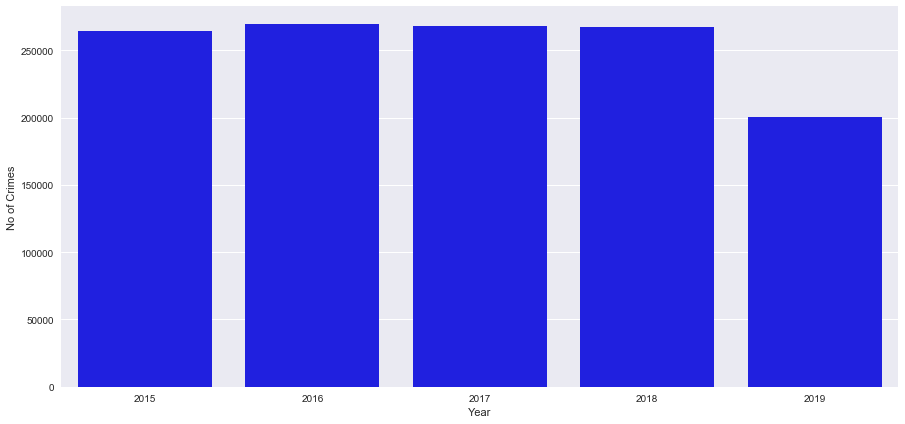

In [48]:
sns.countplot(x='Year',data=df, color=('blue'))
fig = plt.gcf()
plt.ylabel('No of Crimes')
fig.set_size_inches(15,7)

plt.show()

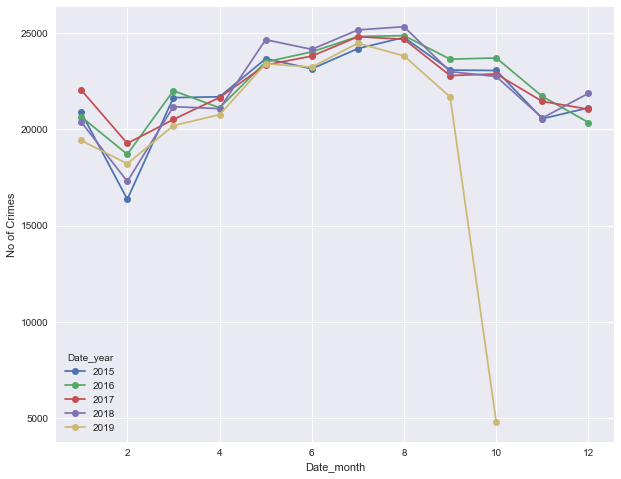

In [47]:
df.groupby(['Date_month','Date_year'])['ID'].count().unstack().plot(marker='o', figsize=(10,8))
plt.ylabel('No of Crimes')

plt.show()

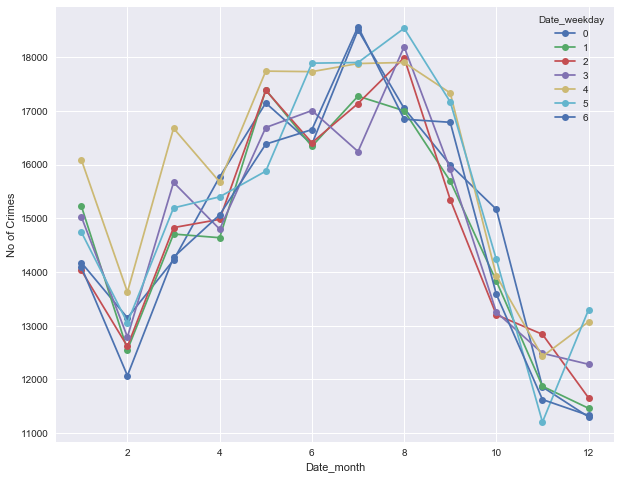

In [46]:
df.groupby(['Date_month','Date_weekday'])['ID'].count().unstack().plot(marker='o', figsize=(10,8))
plt.ylabel('No of Crimes')

plt.show()

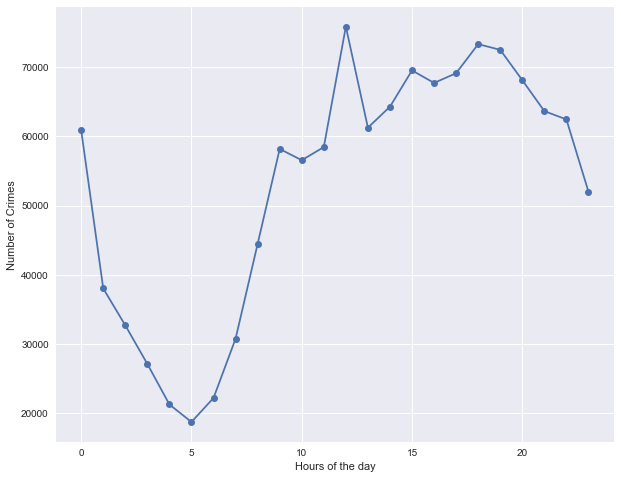

In [48]:
df.groupby(['Date_hour'])['ID'].count().plot(marker='o', figsize=(10,8))
plt.ylabel('Number of Crimes')
plt.xlabel('Hours of the day')
plt.show()

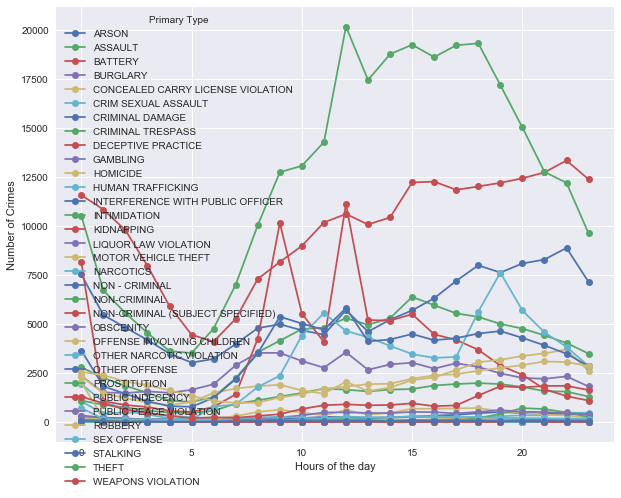

In [52]:
df.groupby(['Date_hour','Primary Type'])['ID'].count().unstack().plot(marker='o', figsize=(10,8))
plt.ylabel('Number of Crimes')
plt.xlabel('Hours of the day')
plt.show()

Clustering

In [62]:
train = df[['Beat', 'Date_hour', 'IUCR']]

In [69]:
train.dtypes

Beat         int64
Date_hour    int64
IUCR         int64
dtype: object

Pre-processing

In [147]:
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] = lbl.transform(list(train[f].values))

In [137]:
from sklearn.cluster import KMeans
clustering_model = KMeans(n_clusters=3)

In [138]:
%time clusters = clustering_model.fit_predict(train)

Wall time: 7.52 s


Output Analysis

Silhouette

In [139]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(train.values, clusters, metric='euclidean', sample_size=2000)
print ("Silhouette score :", silhouette)

Silhouette score : 0.5332286956887882


Join our original dataset with the cluster labels we found.

In [140]:
final = train.join(pd.Series(clusters, index=train.index, name='cluster'))
final['cluster'] = final['cluster'].map(lambda cluster_id: 'cluster' + str(cluster_id))

Compute the cluster sizes

In [141]:
size = pd.DataFrame({'size': final['cluster'].value_counts()})
size.head()

,size
cluster0,2817108
cluster2,2780501
cluster1,2571294


In [142]:
final.head()

,Beat,Date_hour,IUCR,cluster
Date,,,,
01/01/2015 01:00:00 AM,1112,1,73,cluster2
01/01/2015 01:00:00 AM,1112,1,73,cluster2
01/01/2015 01:00:00 AM,1112,1,73,cluster1
01/01/2015 01:00:00 AM,1112,1,73,cluster0
01/01/2015 01:00:00 AM,1112,1,73,cluster2


Scatter Plot

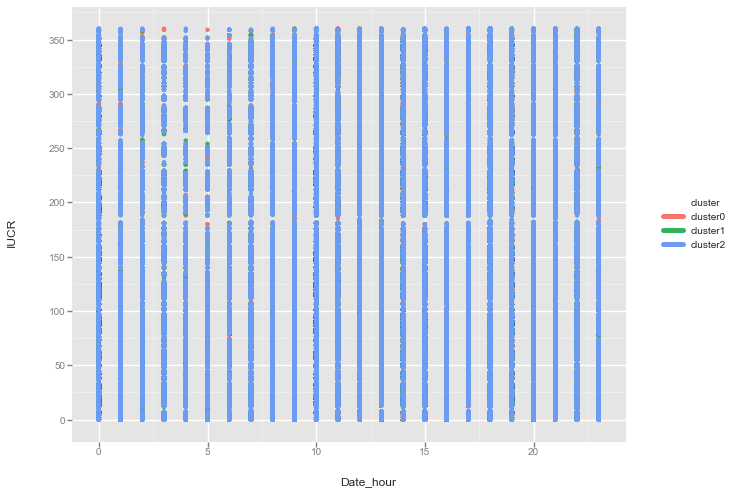

<ggplot: (-9223372036755893721)>


In [145]:
axis_x = final.columns[1]  
axis_y = final.columns[2]  

from ggplot import ggplot, aes, geom_point
print(ggplot(aes(axis_x, axis_y, colour='cluster'), final) + geom_point())